In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math
from implementations import *
from proj1_helpers import *
from misc_helpers import *
from plot_functions import *
from ml_math import *
%load_ext autoreload
%autoreload 2

## Load the training data into feature matrix, class labels, and event ids:

In [2]:
DATA_TRAIN_PATH = 'data/train.csv' # TODO: download train data and supply path here 
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)

## Do your crazy machine learning thing here :) ...

### Standardize

In [3]:
y_norm = normalize(y)
tX_norm = normalize(tX)

### Dimension lifting

In [4]:
def build_poly(tx,degree):
    D = len(tx[0,:])
    N = len(tx[:,0])
    new_x = np.ones((N,1)) #add bias
    if degree>=1:
        for i in range(1,degree+1):
            new_x = np.append(new_x,tx**i,axis=1) 
    return new_x

In [5]:
#Run this box only once!!
degree = 7
new_train = build_poly(tX_norm,degree)
print(np.shape(new_train))
tX = new_train #ECRASE LES DONNEES!!!

(250000, 211)


### Split Data

In [6]:
def split_data(y, x, ratio, myseed=1):
    """split the dataset based on the split ratio."""
    # set seed
    np.random.seed(myseed)
    # generate random indices
    num_row = len(y)
    indices = np.random.permutation(num_row)
    index_split = int(np.floor(ratio * num_row))
    index_tr = indices[: index_split]
    index_te = indices[index_split:]
    # create split
    x_tr = x[index_tr]
    x_te = x[index_te]
    y_tr = y[index_tr]
    y_te = y[index_te]
    return x_tr, x_te, y_tr, y_te

In [7]:
ratio = 0.75
x_train, x_test, y_train, y_test = split_data(y, tX, ratio)

### Gradient Descent

In [9]:
max_iter = 100
gamma = 1
N_w = len(x_train[1,:])
initial_w = np.zeros(N_w)
w_GD, loss_GD = least_squares_GD(y_train, x_train, initial_w, max_iter, gamma, verbose = False)

In [10]:
loss_GD

0.4500477567112258

### Gradient Descent with early stopping

In [12]:
loss_test = np.array([1e7,1e6,1e5])
losses = []
i = 2
N_w = len(x_train[1,:])
w_GD2 = np.zeros(N_w)
max_i = 10
while ((loss_test[i-2]>loss_test[i-1] or loss_test[i-1]>loss_test[i]) )and i<=max_i:
    max_iter = 50
    gamma = 1
    N_w = len(x_train[1,:])
    w_GD2, loss_GD =least_squares_GD(y_train,x_train,w_GD2,max_iters = max_iter,gamma = gamma,verbose = False)
    losses = np.append(losses,loss_GD)
    loss_test = np.append(loss_test,compute_MSE(y_test,x_test,w_GD2))
    i=i+1
    print('i=',i,' gamma=',gamma)

i= 3  gamma= 1
i= 4  gamma= 1
i= 5  gamma= 1
i= 6  gamma= 1
i= 7  gamma= 1
i= 8  gamma= 1
i= 9  gamma= 1
i= 10  gamma= 1
i= 11  gamma= 1


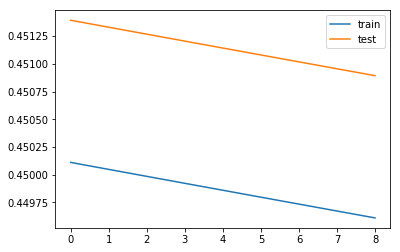

In [13]:
plt.plot(losses, label='train')
plt.plot(loss_test[3:], label='test')
plt.legend()

### Stochastic Gradient Descent

In [15]:
max_iter = 200
gamma = 1
N_w = len(x_train[1,:])
initial_w = np.zeros(N_w)
w_sGD, loss_sGD = least_squares_SGD(y_train,x_train,initial_w,batch_size = 1, 
                                              max_iters = max_iter, gamma = gamma, verbose = False)

In [16]:
loss_sGD

1.3156900139235206

### Least squares

In [17]:
w_LS, loss_LS = least_squares(y_train,x_train)

In [18]:
loss_LS

14.916598101922654

In [19]:
np.shape(x_train)

(187500, 211)

### Test Ridge Regression

In [21]:
# ridge regression:
lambda_ = 0.001
N = np.shape(x_train)[1]
w_RR = np.linalg.inv(x_train.transpose()@x_train+lambda_*np.identity(N))@x_train.transpose()@y_train
loss_RR = compute_MSE(y_train,x_train,w_RR)
print(loss_RR)

0.3396614064167567


### Test Logistic Regression

In [22]:
max_iter = 100
gamma = 1
N_w = len(x_train[1,:])
initial_w = np.zeros(N_w)
w_LR_SGD, loss_LR_SGD = logistic_regression(y_train, x_train, initial_w, 
                                              max_iter, gamma, 
                                            verbose = False, use_SGD = True, batch_size = 1)
w_LR_GD, loss_LR_GD = logistic_regression(y_train, x_train, initial_w, 
                                              max_iter, gamma, 
                                          verbose = False, use_SGD = False, batch_size = 1)

C:\Users\Remi\turing\ml_math.py:48: RuntimeWarning: divide by zero encountered in log
  loss = y.T.dot(np.log(pred)) + (1 - y).T.dot(np.log(1 - pred))


### Test Regulated Logistic Regression

In [23]:
max_iter = 100
gamma = 1
lambda_ = 0.7
N_w = len(x_train[1,:])
initial_w = np.zeros(N_w)
w_RLR_SGD, loss_LR_SGD = reg_logistic_regression(y_train, x_train, lambda_, initial_w, 
                                              max_iter, gamma,
                                                verbose = False, use_SGD = True)
w_RLR_GD, loss_LR_GD = reg_logistic_regression(y_train, x_train, lambda_, initial_w, 
                                              max_iter, gamma,
                                              verbose = False, use_SGD = False, batch_size = 1)

C:\Users\Remi\turing\ml_math.py:48: RuntimeWarning: divide by zero encountered in log
  loss = y.T.dot(np.log(pred)) + (1 - y).T.dot(np.log(1 - pred))


### Test the best

In [25]:
print('LOSS TEST:')
print('GD: ', compute_MSE(y_test,x_test,w_GD))
print('GD2: ', compute_MSE(y_test,x_test,w_GD2))
print('sGD: ', compute_MSE(y_test,x_test,w_sGD))
print('LS: ', compute_MSE(y_test,x_test,w_LS))
print('RR: ', compute_MSE(y_test,x_test,w_RR))
print('LR_SGD: ', compute_MSE(y_test,x_test,w_LR_SGD))
print('LR_GD: ', compute_MSE(y_test,x_test,w_LR_GD))
print('RLR_SGD: ', compute_MSE(y_test,x_test,w_RLR_SGD))
print('RLR_GD: ', compute_MSE(y_test,x_test,w_RLR_GD))

LOSS TEST:
GD:  0.4513296664241211
GD2:  0.4508929172481604
sGD:  0.6884349138153611
LS:  15.384528671428312
RR:  0.3410132415299437
LR_SGD:  17519697015346.2
LR_GD:  17519697015346.2
RLR_SGD:  893839341.222566
RLR_GD:  893839341.222566


### Choose the weight you want

In [26]:
weights = w_GD

## Generate predictions and save ouput in csv format for submission:

In [27]:
DATA_TEST_PATH = 'data/test.csv' # TODO: download train data and supply path here 
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

In [28]:
OUTPUT_PATH = 'result/to_try.csv' # TODO: fill in desired name of output file for submission
y_pred = predict_labels(weights, build_poly(tX_test,degree))
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)

FileNotFoundError: [Errno 2] No such file or directory: 'result/to_try.csv'

In [ ]:
np.shape(build_poly(tX_test,degree))